In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from tensorflow.keras.losses import MSE

In [3]:
img=Image.open("../panda2.jpg").resize((40,40))

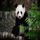

In [4]:
img

In [5]:
small=np.array(img).mean(axis=2)

In [6]:
small.shape

(40, 40)

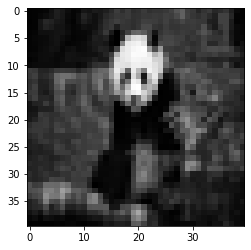

In [7]:
plt.imshow(small,cmap="gray")

In [8]:
orignal=small.flatten()

In [9]:
orignal.shape

(1600,)

In [10]:
population=np.random.randint(0,255,(1000,orignal.shape[0]))

In [11]:
population.shape

(1000, 1600)

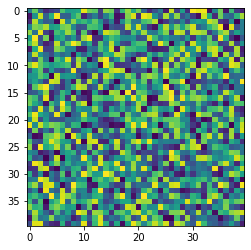

In [12]:
plt.imshow(population[0].reshape(*small.shape))

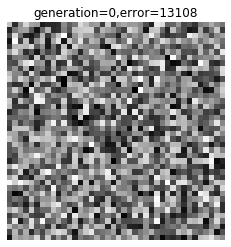

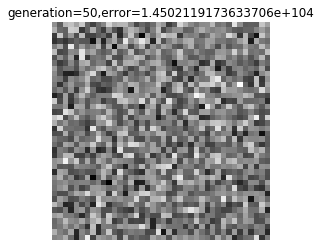

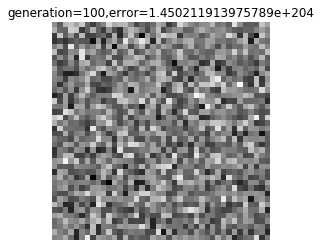

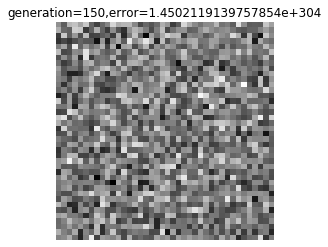

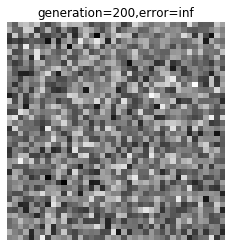

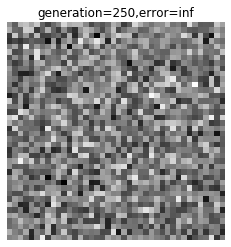

C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\matplotlib\image.py:401: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\matplotlib\image.py:406: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


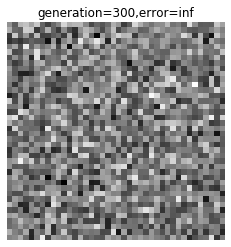

C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\numpy\core\_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Users\Naman\Anaconda3\envs\tensor\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a ma

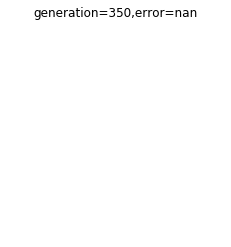

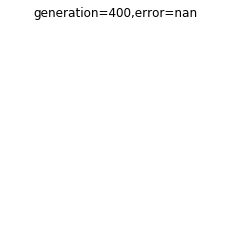

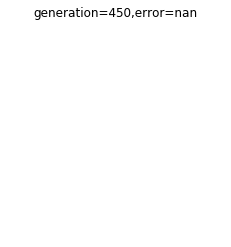

In [ ]:
for generation in range(1000):
    error=MSE(orignal,population).numpy()
    indices=error.argsort()
    fit=population[indices[:10]]
    
    first=fit[np.random.randint(0,10,1000)]
    second=fit[np.random.randint(0,10,1000)]
    data=np.stack([first,second],axis=2)
    
    first_sel=np.random.randint(0,10,population.shape)
    second_sel=10-first_sel
    selector=np.stack([first_sel,second_sel],axis=2)
    
    mutation=np.random.randn(*population.shape)
    population=(data*selector).sum(axis=2) + mutation
    
    if generation%50==0:
        plt.figure()
        plt.title("generation={},error={}".format(generation,str(error[0])))
        plt.imshow(population[0].reshape(*small.shape),cmap="gray")
        plt.axis(False)
        plt.show()